# Classifying movie reviews: a binary classification example

In [1]:
from keras.datasets import imdb
import numpy as np

from keras import models
from keras import layers
from keras import optimizers

import matplotlib.pyplot as plt

Using TensorFlow backend.


### Load data

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

### exploring data

In [3]:
type(train_data)

numpy.ndarray

In [4]:
train_data.ndim

1

In [5]:
train_data.shape

(25000,)

In [6]:
len(train_data[1])

189

In [7]:
train_data[0][0] #Vector data — 2D tensors of shape (samples, features)

1

In [8]:
train_data[0][:5]

[1, 14, 22, 16, 43]

In [9]:
train_labels[0]

1

each review has words labelled with numbers from 1 to 9999:

In [10]:
max([max(sequence) for sequence in train_data]) #because: num_words=10000

9999

In [11]:
min([min(sequence) for sequence in train_data]) 

1

### Back to english

In [12]:
word_index = imdb.get_word_index()

In [13]:
type(word_index)

dict

In [14]:
dict(list(word_index.items())[0:2])

{'fawn': 34701, 'tsukino': 52006}

In [15]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [16]:
reverse_word_index.get(1)

'the'

### as example, revert review n.0

In [17]:
words = [reverse_word_index.get(i - 3, '##') for i in train_data[0]]

In [18]:
len(words)

218

In [19]:
decoded_review = ' '.join(words)

In [20]:
decoded_review

"## this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ## is an amazing actor and now the same being director ## father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ## and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ## to the two little boy's that played the ## of norman and paul they were just brilliant children are often left out of the ## list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't

# One-hot encode

 so far train_data is an 1d-array where each element contains a list;
 now we transform it in a 2d-array

In [21]:
# Note: in this way we do not take into account the possibility one word appers more than one time

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        #print(sequence)
        results[i, sequence] = 1.
    return results

In [22]:
len(train_data)

25000

In [23]:
x_train = vectorize_sequences(train_data)

In [24]:
x_test = vectorize_sequences(test_data)

In [25]:
type(x_train)

numpy.ndarray

In [26]:
x_train.shape

(25000, 10000)

In [27]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [28]:
len(x_train[3])

10000

In [29]:
x_train[0][:6]

array([0., 1., 1., 0., 1., 1.])

### transform also the labels

In [30]:
type(train_labels[0])

numpy.int64

In [31]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [32]:
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

In [33]:
train_labels

array([1, 0, 0, ..., 0, 1, 0])

In [34]:
type(y_train[0])

numpy.float32

# Building network

In [35]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [36]:
#model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

### create validation

In [37]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

### fit

In [38]:
history = model.fit(partial_x_train, partial_y_train, epochs=5, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/5
15000/15000 [==============================] - 1s 63us/step - loss: 0.5071 - acc: 0.7831 - val_loss: 0.3793 - val_acc: 0.8678
Epoch 2/5
15000/15000 [==============================] - 1s 42us/step - loss: 0.3000 - acc: 0.9045 - val_loss: 0.3002 - val_acc: 0.8898
Epoch 3/5
15000/15000 [==============================] - 1s 43us/step - loss: 0.2178 - acc: 0.9285 - val_loss: 0.3088 - val_acc: 0.8711
Epoch 4/5
15000/15000 [==============================] - 1s 43us/step - loss: 0.1750 - acc: 0.9441 - val_loss: 0.2836 - val_acc: 0.8844
Epoch 5/5
15000/15000 [==============================] - 1s 43us/step - loss: 0.1428 - acc: 0.9543 - val_loss: 0.2846 - val_acc: 0.8865


### info from training

In [39]:
history_dict = history.history

In [40]:
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

### plots

In [41]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

epochs = range(1, len(acc_values) + 1)

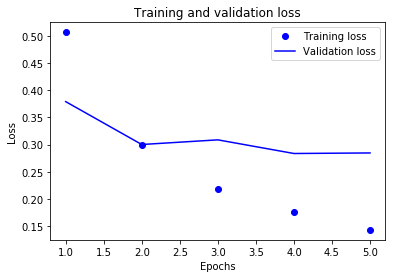

In [42]:
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

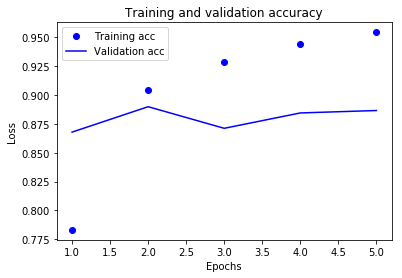

In [43]:
#plt.clf()

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# evaluate on the test set

In [44]:
results = model.evaluate(x_test, y_test)

25000/25000 [==============================] - 2s 64us/step


In [45]:
results

[0.30761990685462953, 0.87716]

# prediction

In [46]:
model.predict(x_test)

array([[0.22134371],
       [0.99895084],
       [0.75955755],
       ...,
       [0.07821123],
       [0.09672497],
       [0.4083499 ]], dtype=float32)